In [1]:
library(readxl)
library(dplyr)

customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
# install.packages("ggplot2")
library(ggplot2)
library(dplyr)

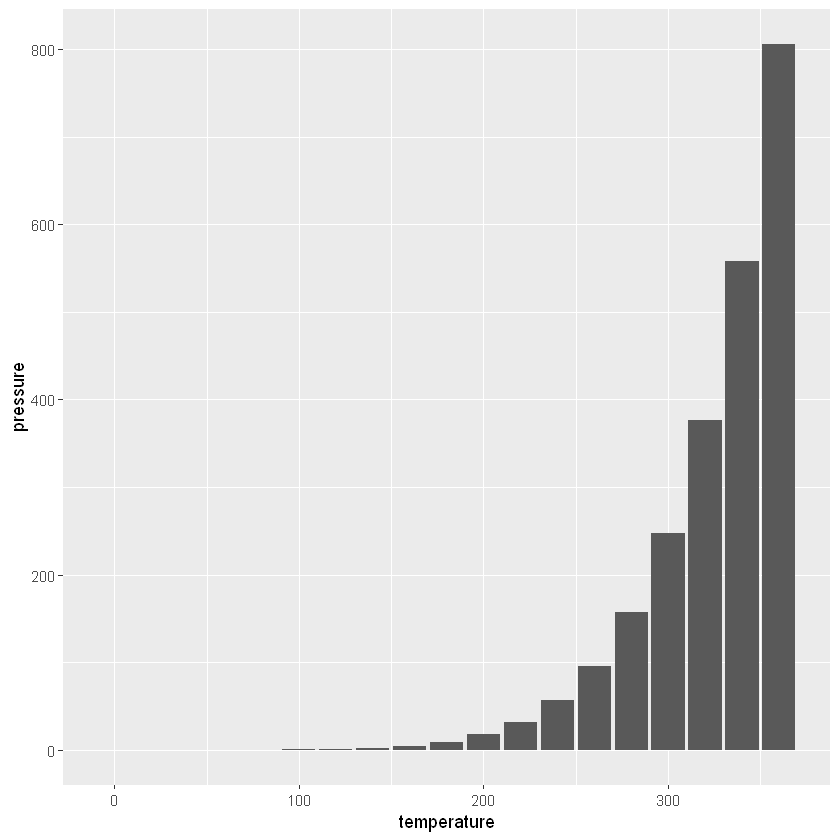

In [5]:
ggplot(data = pressure, aes(x = temperature, y = pressure)) +
geom_col()

In [8]:
df_cfm_order  <- inner_join(reservation_r, order_info_r, by = "reserv_no")%>%
select(customer_id, reserv_no, visitor_cnt, cancel, order_no, item_id, sales) %>%
arrange(customer_id,reserv_no,item_id)
                            

In [9]:
head(df_cfm_order)

customer_id,reserv_no,visitor_cnt,cancel,order_no,item_id,sales
W1327595,2019061801,2,N,190618107186310010,M0001,48000
W1327595,2019071801,4,N,190718107186310010,M0005,140000
W1327803,2019060301,4,N,190603578341100100,M0005,140000
W1327803,2019091506,2,N,190915137187310010,M0005,70000
W1328432,2019060601,4,N,190606607189610010,M0005,140000
W1328432,2019060601,4,N,190606607189610010,M0010,12000


In [10]:
df_sct_graph <- df_cfm_order %>%
group_by(customer_id) %>%
summarise(vst_cnt = sum(visitor_cnt), cust_amt = sum(sales/1000))

head(df_sct_graph)


customer_id,vst_cnt,cust_amt
W1327595,6,188
W1327803,6,210
W1328432,20,246
W1328505,20,287
W1328786,1,10
W1328985,8,178


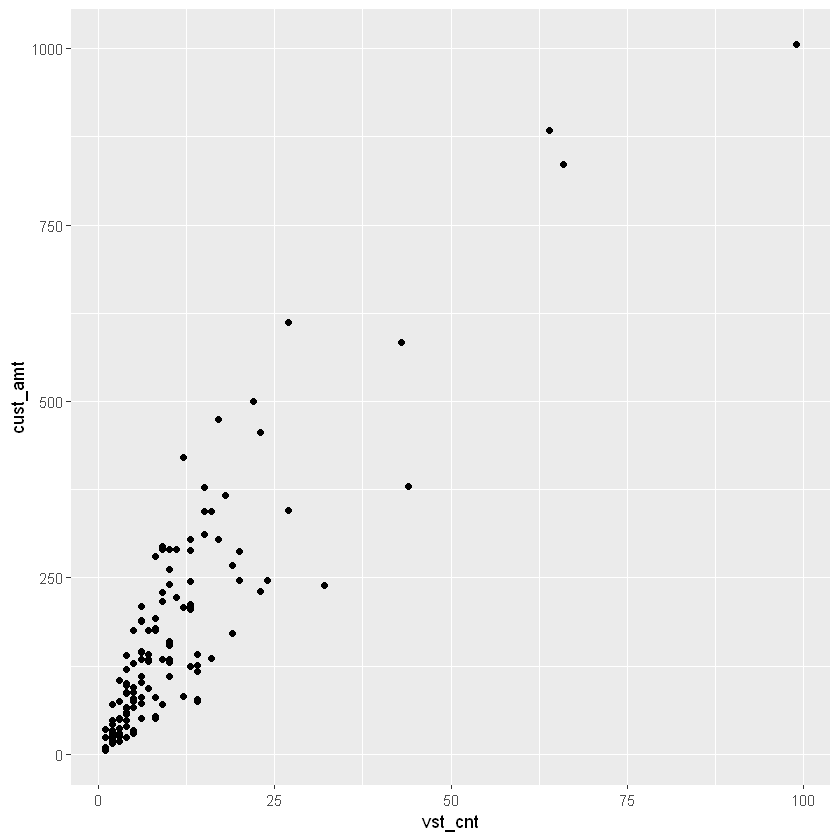

In [13]:
ggplot(data = df_sct_graph,aes(x = vst_cnt, y = cust_amt)) +
geom_point()

Warning message:
"Removed 5 rows containing missing values (geom_point)."

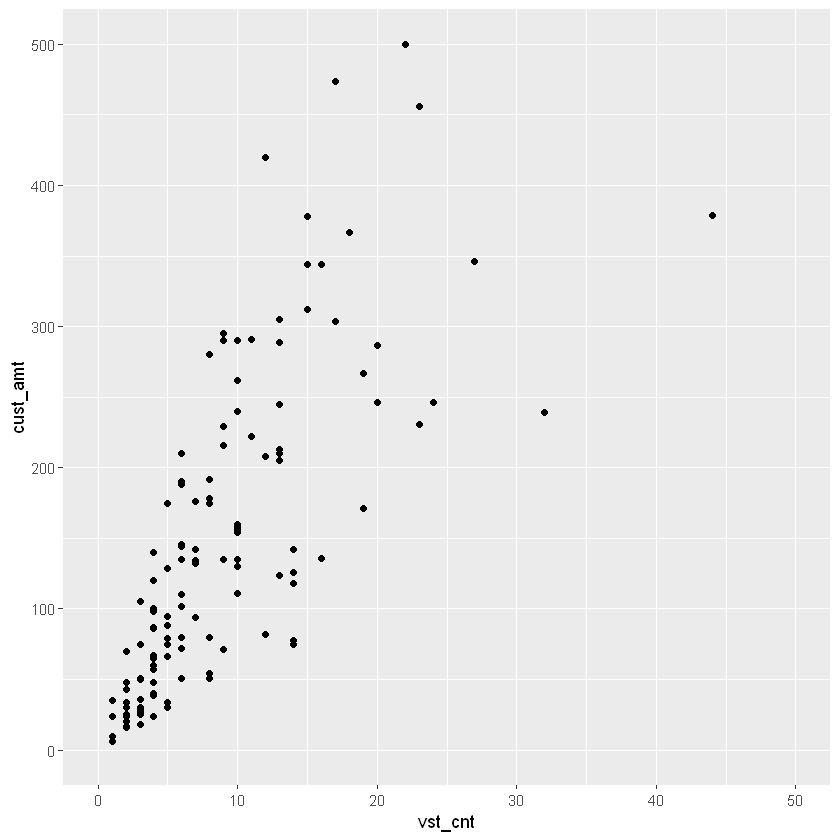

In [14]:
ggplot(data = df_sct_graph,aes(x = vst_cnt, y = cust_amt)) +
geom_point() +
xlim(0,50) + ylim(0,500)

In [15]:
df_sct_graph2 <- inner_join(df_sct_graph, customer_r, by="customer_id") %>% 
select(vst_cnt, cust_amt, sex_code)

head(df_sct_graph2)

vst_cnt,cust_amt,sex_code
6,188,M
6,210,M
20,246,M
20,287,F
1,10,M
8,178,M


Warning message:
"Removed 5 rows containing missing values (geom_point)."

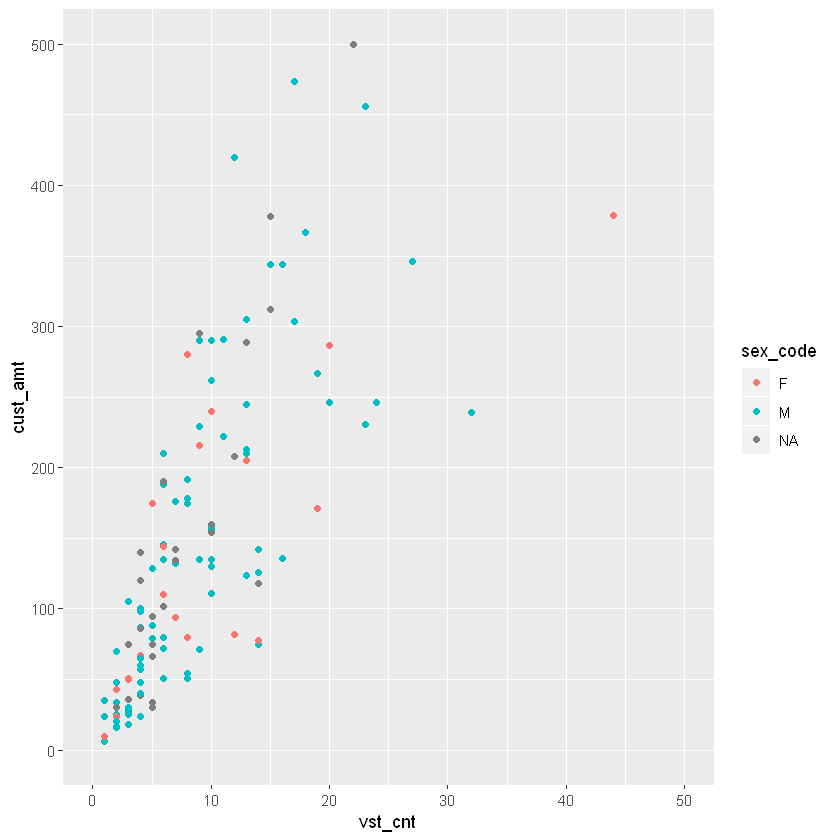

In [16]:
ggplot(data = df_sct_graph2, aes(x = vst_cnt, y = cust_amt, color = sex_code)) +
    geom_point() +
    xlim(0, 50) +
    ylim(0, 500)

In [17]:
df_branch_sales_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no") %>%
    select(branch, sales) %>%
    arrange(branch, sales)

In [18]:
df_branch_sales_2 <- df_branch_sales_1 %>% group_by(branch) %>%
    summarise(amt = sum(sales) / 1000) %>%
    arrange(desc(amt))

In [19]:
df_branch_sales_2 

branch,amt
강남,4074
영등포,1516
종로,1428
용산,1366
서초,1295
송파,1190
서대문,1180
동작,1149
관악,1101
노원,1054


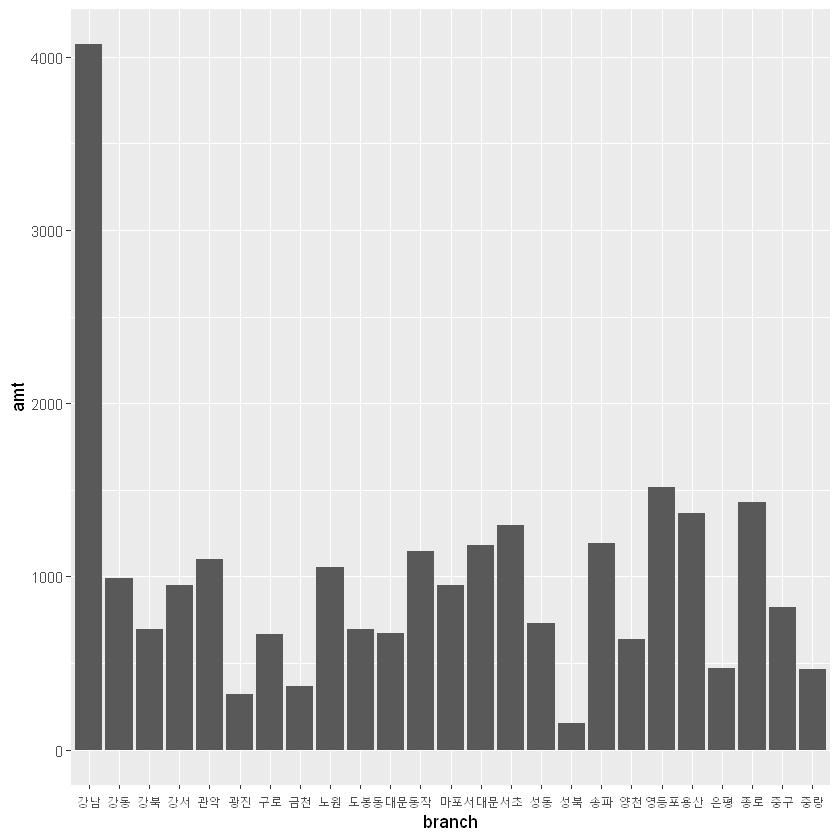

In [20]:
ggplot(df_branch_sales_2, aes(x = branch, y = amt)) +
geom_bar(stat = "identity")

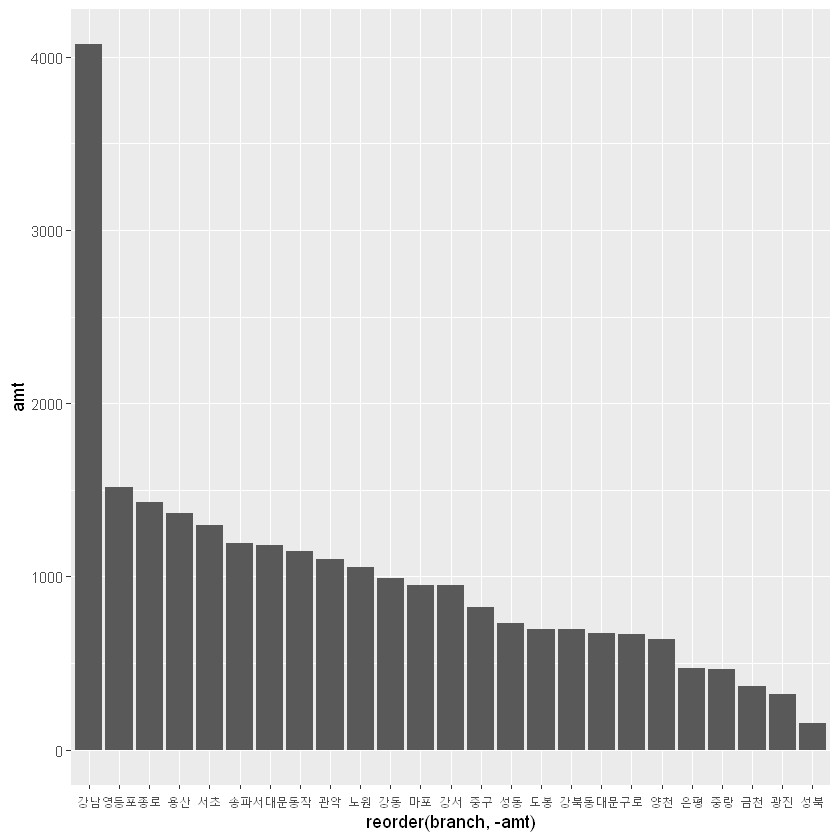

In [24]:
ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt)) +
geom_bar(stat = "identity")

Warning message:
"Removed 20 rows containing missing values (position_stack)."

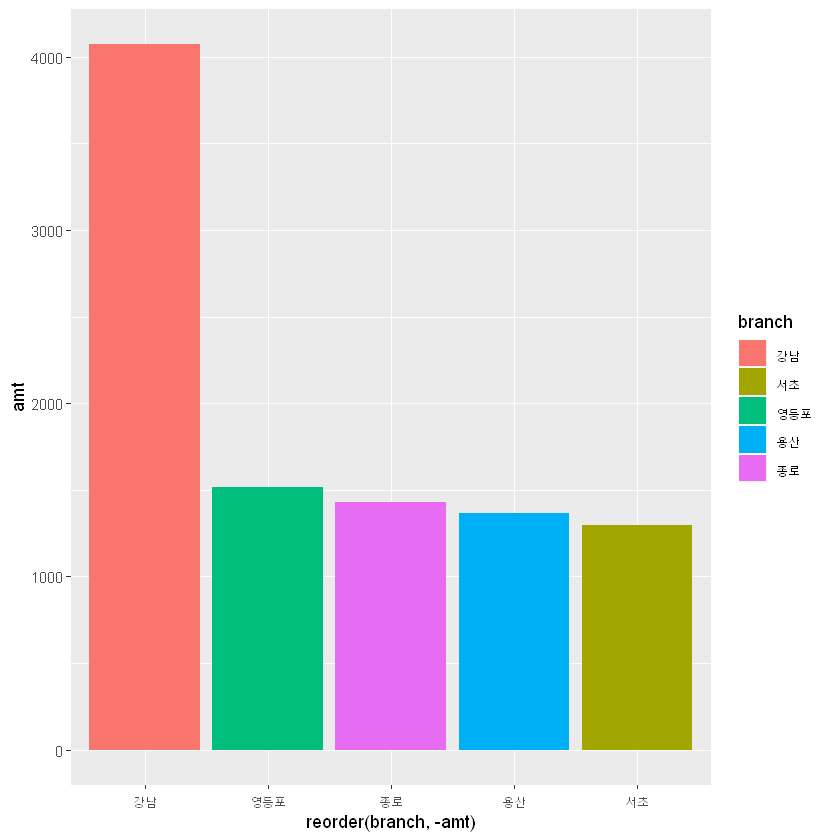

In [38]:
ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt, fill = branch)) +
    geom_bar(stat = "identity")+
xlim(c("강남", "영등포", "종로", "용산", "서초"))


Warning message:
"Removed 20 rows containing missing values (position_stack)."

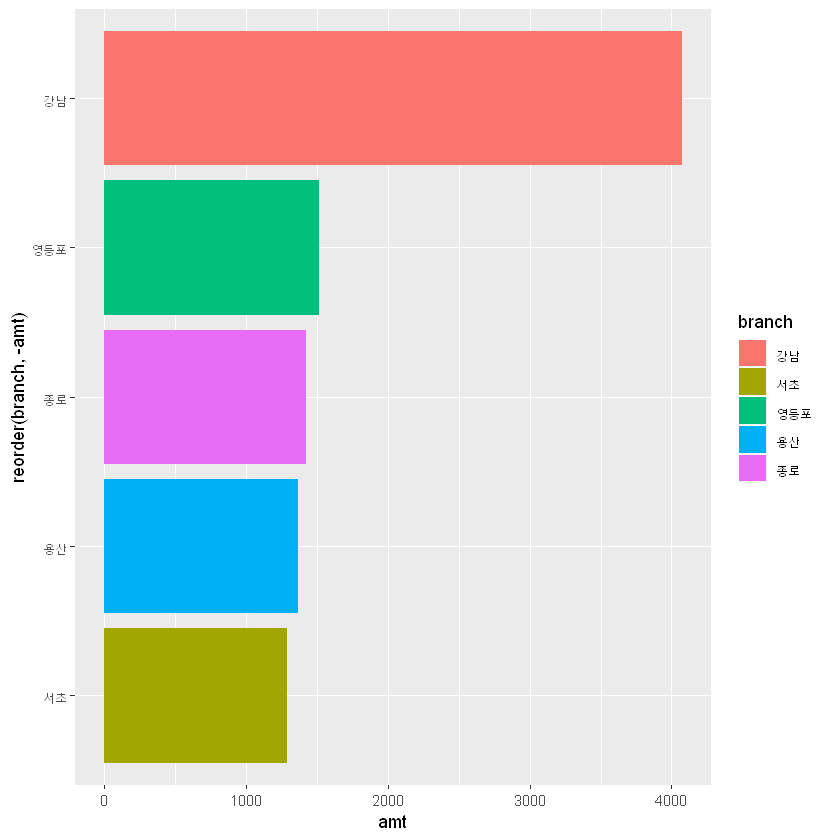

In [44]:
gg <- ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt, fill = branch)) +
    geom_bar(stat = "identity") +
    xlim(c("서초", "용산", "종로", "영등포", "강남"))
gg <- gg + coord_flip()
gg

Warning message:
"Removed 20 rows containing missing values (position_stack)."

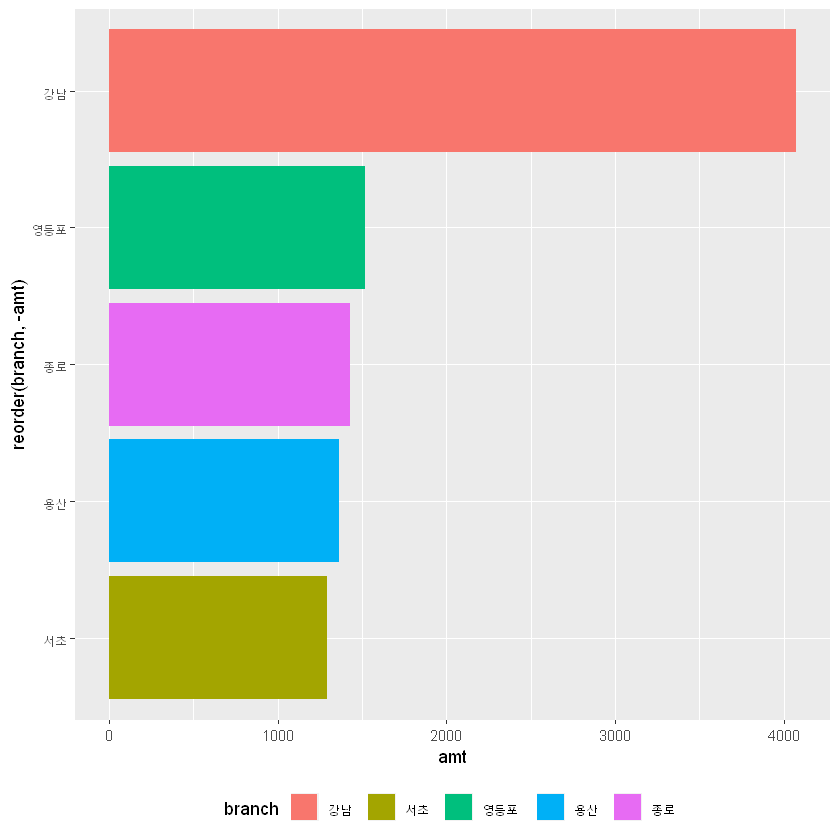

In [48]:
gg <- gg + theme(legend.position = "bottom")
gg

Warning message:
"Removed 20 rows containing missing values (position_stack)."

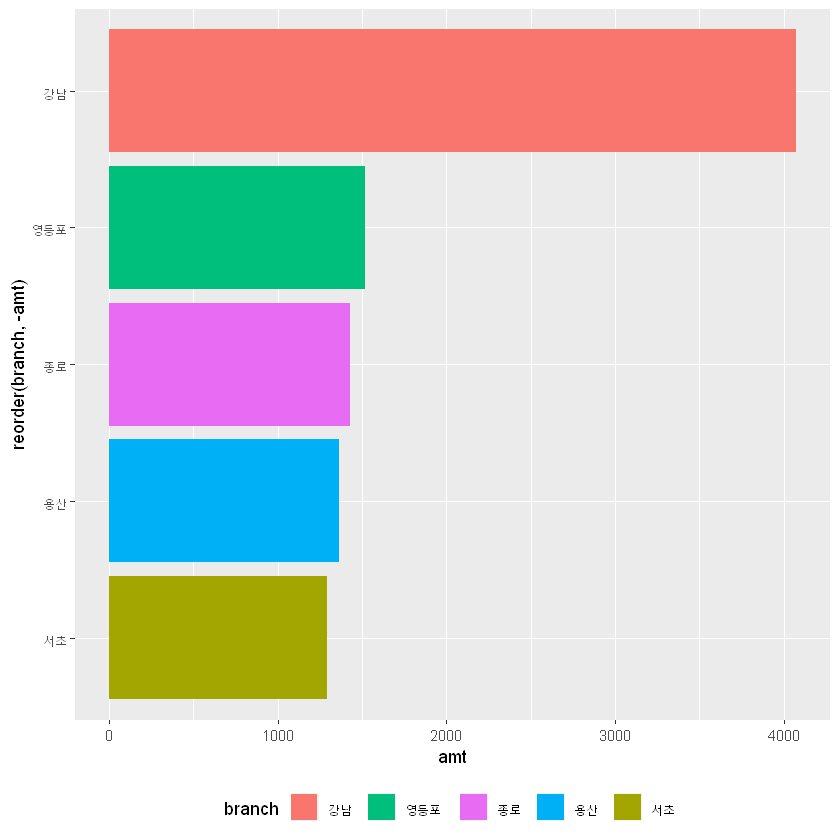

In [49]:
gg <- gg + scale_fill_discrete(breaks = c("강남", "영등포", "종로", "용산", "서초"))
gg

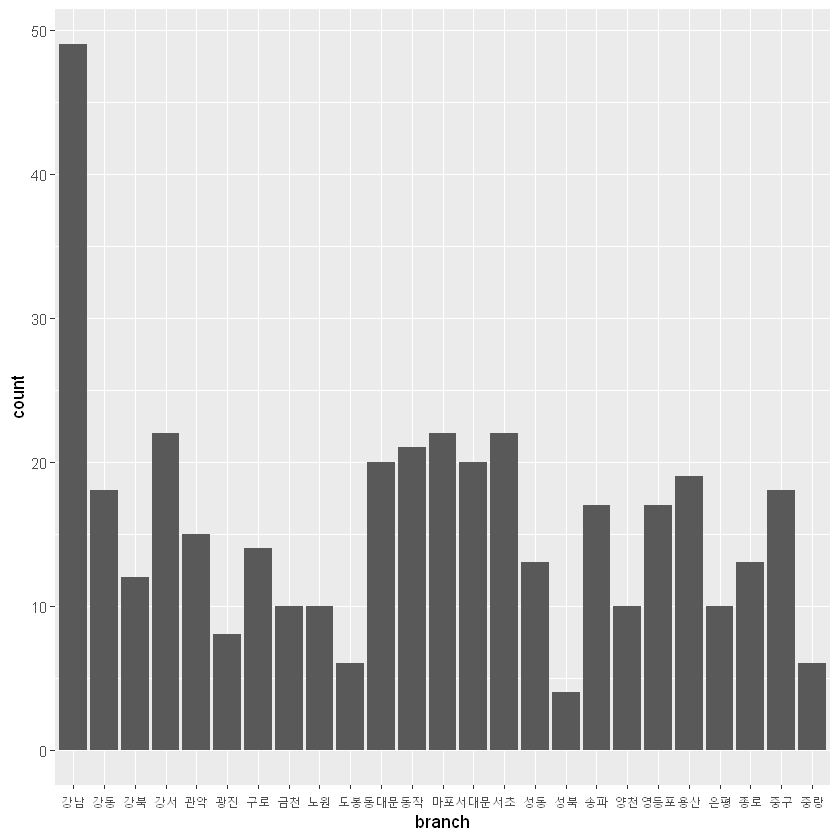

In [50]:
gg <- ggplot(data = reservation_r,aes(x = branch)) + geom_bar(stat = "count")
gg

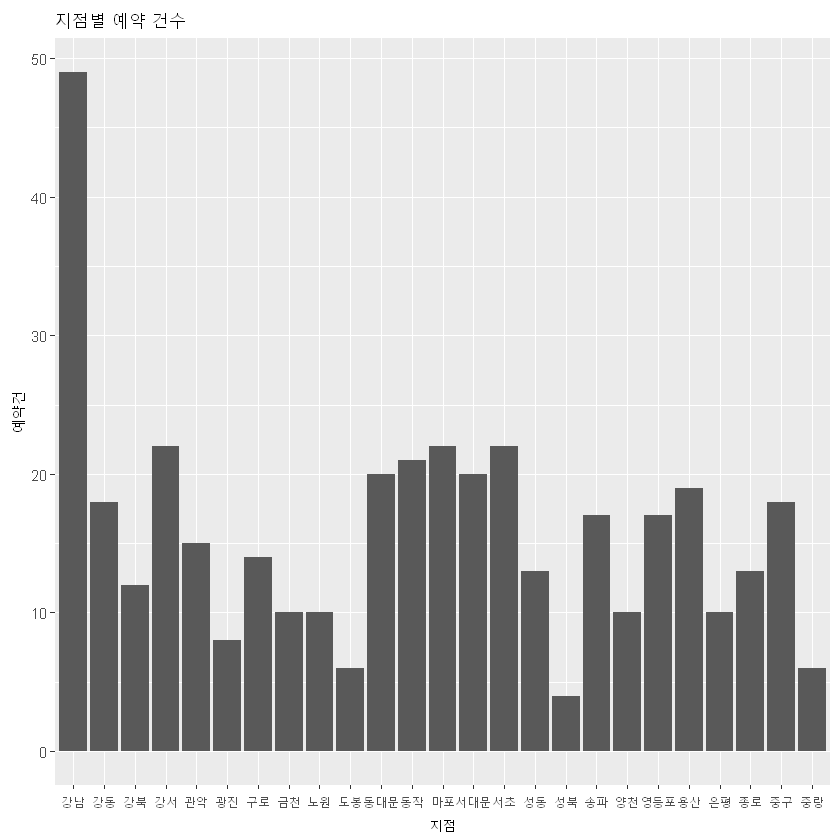

In [51]:
gg <- gg + labs(title = "지점별 예약 건수", x = "지점", y = "예약건")
gg

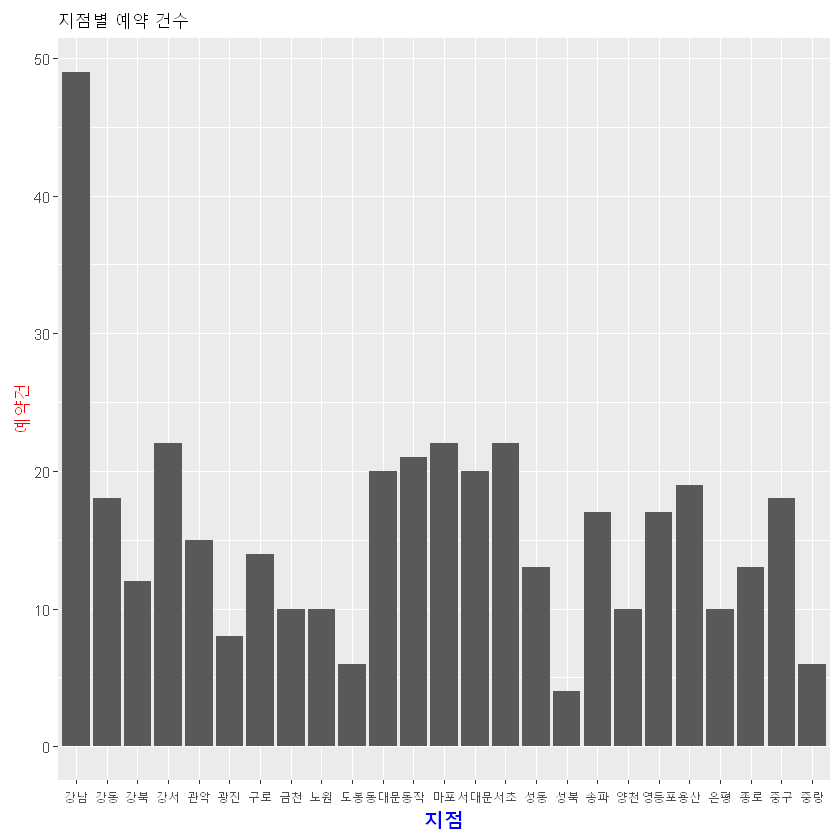

In [52]:
gg <- gg + theme(axis.title.x = element_text(size = 15,
                                             color = "blue",
                                             face = 'bold',
                                             angle = 0) ,
                 axis.title.y = element_text(size = 13,
                                             color = 'red',
                                             angle = 90)
                )

gg

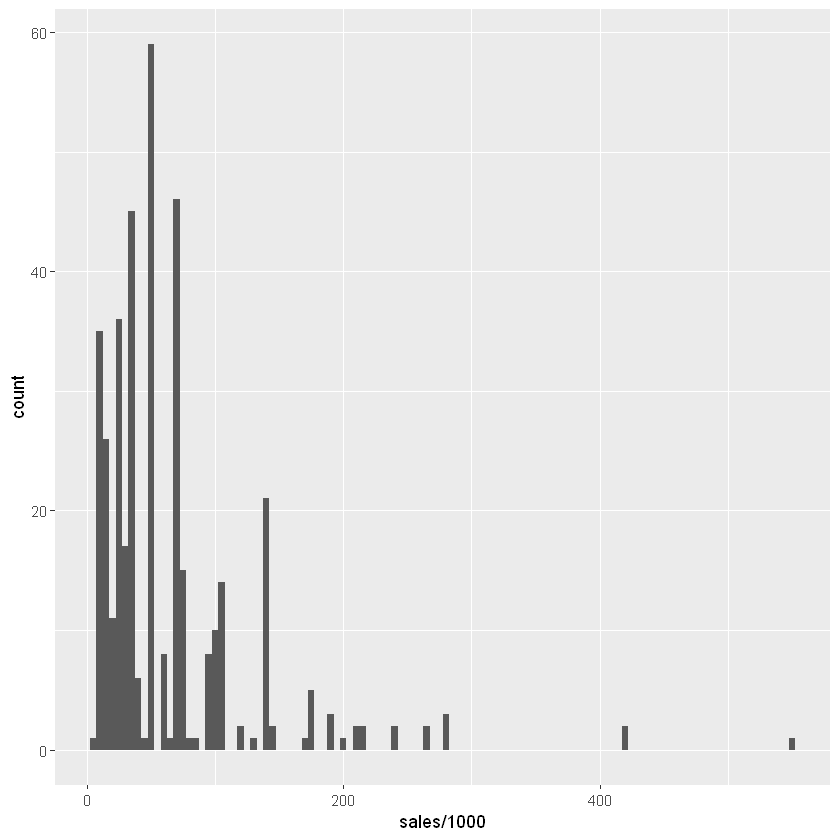

In [53]:
ggplot(data = order_info_r, aes(x = sales/1000)) + geom_histogram(binwidth = 5)

In [54]:
# 파이차트 데이터 준비하기
df_pie_graph <- inner_join(order_info_r, item_r, by = "item_id") %>%
    group_by(item_id, product_name) %>%
    summarise(amt_item = sum(sales/1000)) %>%
    select(item_id, amt_item, product_name)

df_pie_graph 

`summarise()` has grouped output by 'item_id'. You can override using the `.groups` argument.


item_id,amt_item,product_name
M0001,5808,SPECIAL_SET
M0002,1968,PASTA
M0003,1666,PIZZA
M0004,1625,SEA_FOOD
M0005,9380,STEAK
M0006,2075,SALAD_BAR
M0007,525,SALAD
M0008,610,SANDWICH
M0009,856,WINE
M0010,444,JUICE


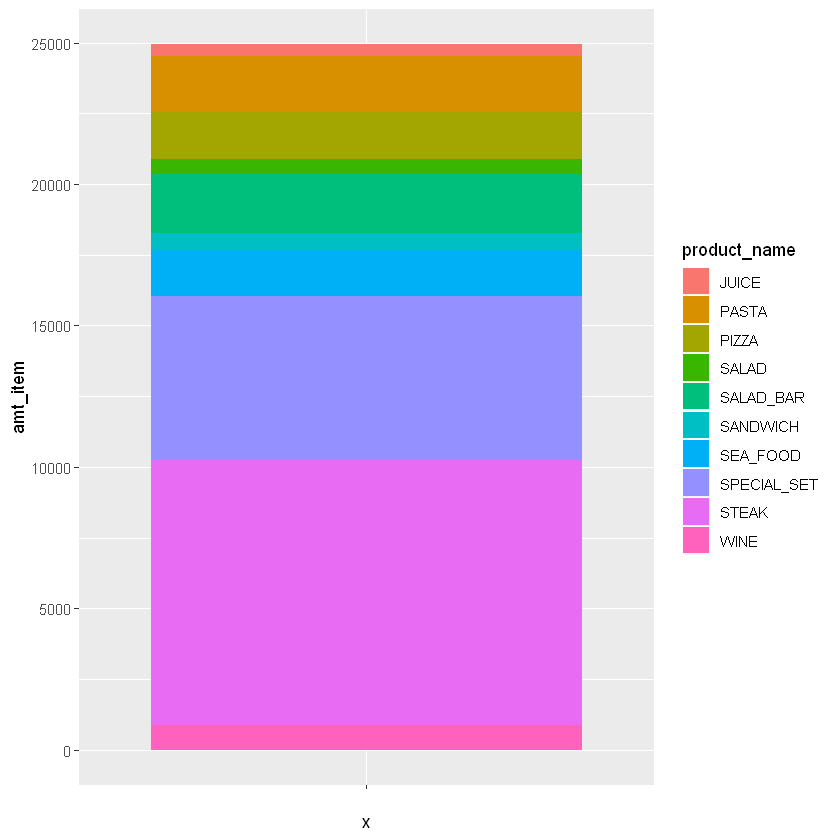

In [55]:
# 누적 막대 그래프로 그리기
ggplot(df_pie_graph, aes(x = "", y = amt_item, fill = product_name)) +
    geom_bar(stat = "identity")

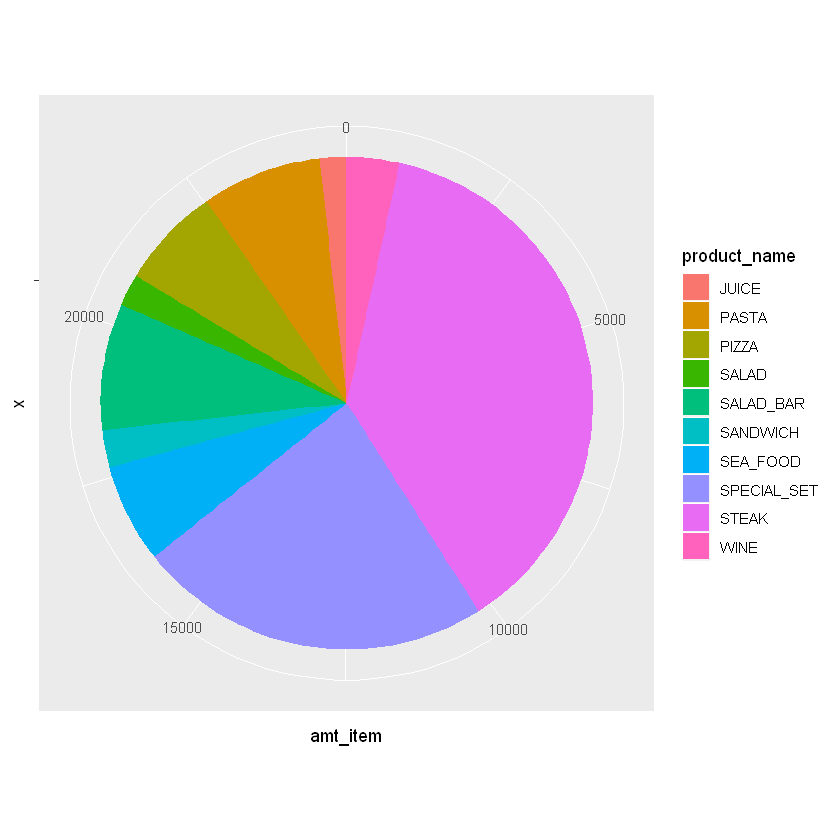

In [56]:
# 파이차트 그리기
gg <- ggplot(df_pie_graph, aes(x = "", y = amt_item, fill = product_name)) +
geom_bar(stat = "identity")+
coord_polar("y", start=0)
gg

Warning message in pal_name(palette, type):
"Unknown palette Apple"Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Greens is 9
Returning the palette you asked for with that many colors
"

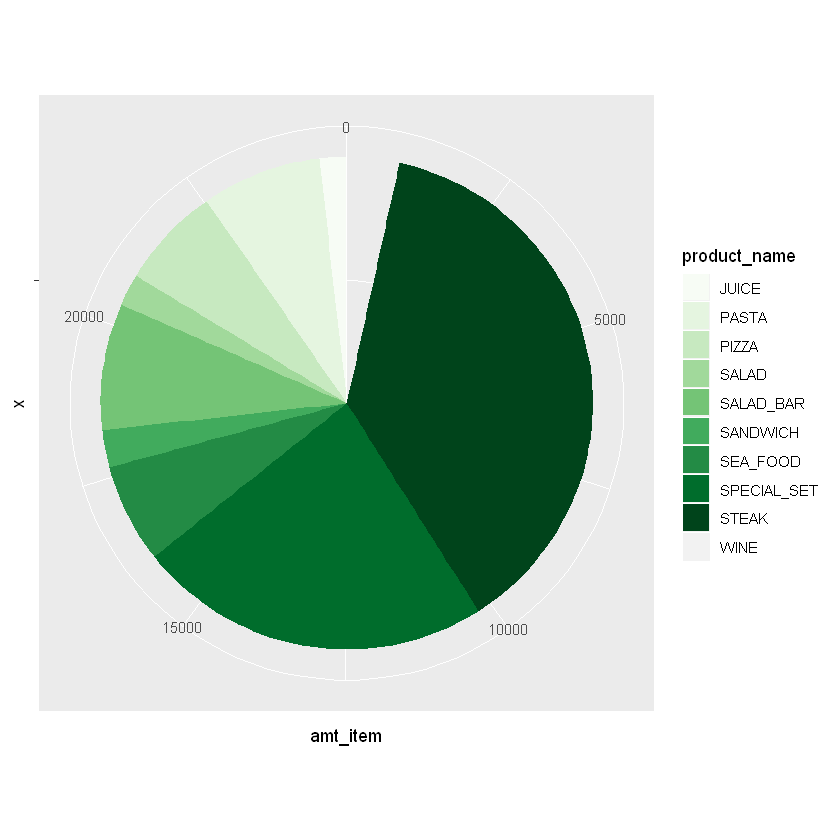

In [64]:
# Spectral 색상 팔레트로 채움, direction = -1을 적용하면 팔레트 순서가 바뀜
gg <- gg + scale_fill_brewer(palette = "Apple")
gg

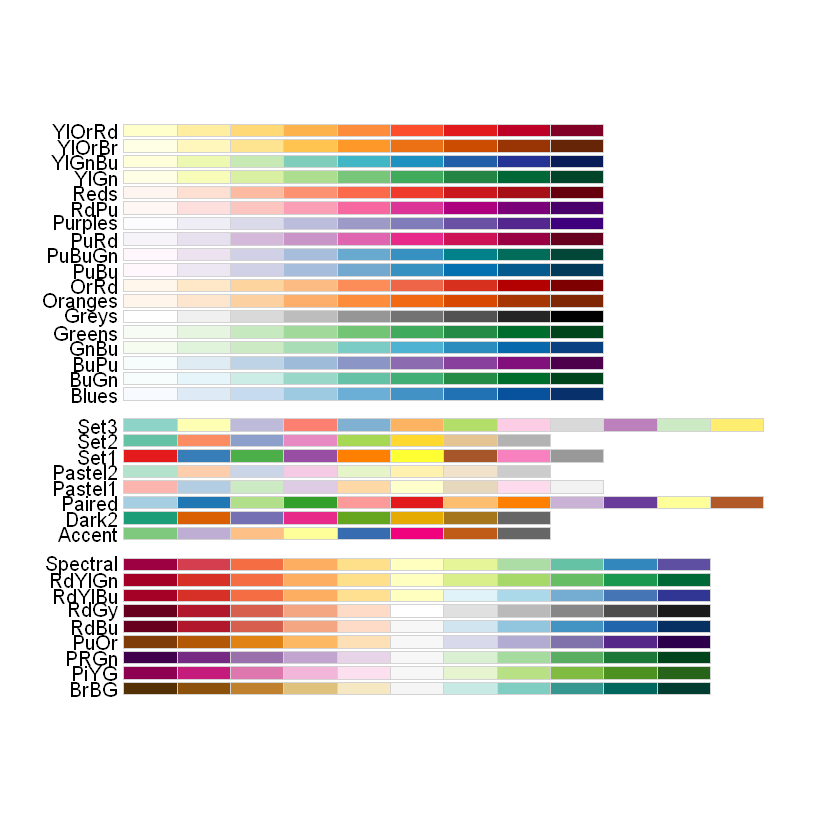

In [60]:
# install.packages("RColorBrewer")
library(RColorBrewer)
display.brewer.all()
